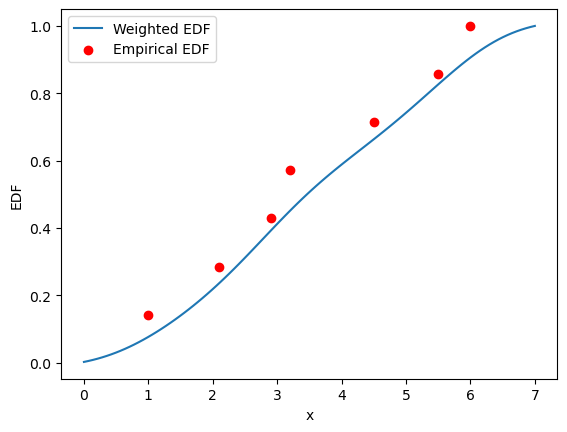

In [61]:
import numpy as np

def gaussian_kernel(u, bandwidth):
    """Gaussian kernel function."""
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (u / bandwidth) ** 2)

def weighted_edf(x, data, bandwidth):
    """Weighted empirical distribution function with Nadaraya-Watson kernel weights."""
    weights = np.zeros_like(x)
    
    for i, xi in enumerate(x):
        # Compute kernel weights for each data point
        u = (xi - data) / bandwidth
        kernel_weights = gaussian_kernel(u, 1)  # bandwidth is already factored into u
        weights[i] = np.sum(kernel_weights)
    
    # Normalize the weights
    weights /= np.sum(weights)
    
    # Cumulative sum to get the EDF
    edf_values = np.cumsum(weights)
    
    return edf_values

# Sample data
data = np.array([1.0, 2.1, 2.9, 3.2, 4.5, 5.5, 6.0])
x = np.linspace(0, 7, 100)
bandwidth = 0.8

edf_values = weighted_edf(x, data, bandwidth)

# Plot
import matplotlib.pyplot as plt

plt.plot(x, edf_values, label="Weighted EDF")
plt.scatter(data, np.arange(1, len(data) + 1) / len(data), color='red', marker='o', label="Empirical EDF")
plt.legend()
plt.xlabel("x")
plt.ylabel("EDF")
plt.show()


In [5]:
import numpy as np

def gaussian_kernel(u):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*u**2)

def weighted_empirical_distribution(t, x, data, h_time, h_covariate):
    """
    Calculate the weighted empirical distribution at (t, x) using Nadaraya-Watson kernel.
    
    Parameters:
    - t: time value for which the distribution is estimated.
    - x: covariate value for which the distribution is estimated.
    - data: a list of tuples where each tuple is (time, covariate).
    - h_time: bandwidth for time direction.
    - h_covariate: bandwidth for covariate direction.
    
    Returns:
    - Estimated distribution value at (t, x).
    """
    n = len(data)
    weights = np.zeros(n)
    
    for i, (t_i, x_i) in enumerate(data):
        u_time = (t - t_i) / h_time
        u_covariate = (x - x_i) / h_covariate
        weights[i] = gaussian_kernel(u_time) * gaussian_kernel(u_covariate)
        
    return np.sum(weights) / n

# Example
data = [(0.5, 1.2), (0.7, 1.4), (0.9, 1.1), (1.2, 1.3)]
t, x = 0.8, 1.25
h_time, h_covariate = 0.1, 0.05
print(weighted_empirical_distribution(t, x, data, h_time, h_covariate))



0.0008123789275694655


In [6]:
import numpy as np

class NadarayaWatsonEstimator:
    def __init__(self, bandwidth_time, bandwidth_covariate):
        self.bandwidth_time = bandwidth_time
        self.bandwidth_covariate = bandwidth_covariate
        
    def gaussian_kernel(self, u):
        return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)
    
    def fit(self, times, covariates, values):
        self.times = times
        self.covariates = covariates
        self.values = values
        
    def predict(self, t, x):
        weights_time = self.gaussian_kernel((t - self.times) / self.bandwidth_time)
        weights_covariate = self.gaussian_kernel(x - self.covariates)
        
        weights = weights_time * weights_covariate
        
        return np.sum(weights * self.values) / np.sum(weights)

# Example usage:
# Create a sample dataset
np.random.seed(0)
n = 100
times = np.random.rand(n)
covariates = np.random.rand(n)
values = times + covariates + 0.1 * np.random.randn(n)

# Instantiate the estimator with bandwidths for time and covariate
estimator = NadarayaWatsonEstimator(bandwidth_time=0.1, bandwidth_covariate=0.1)

# Fit the estimator with the sample data
estimator.fit(times, covariates, values)

# Predict the value at a new time and covariate
predicted_value = estimator.predict(0.5, 0.5)

predicted_value


1.0704452941807607

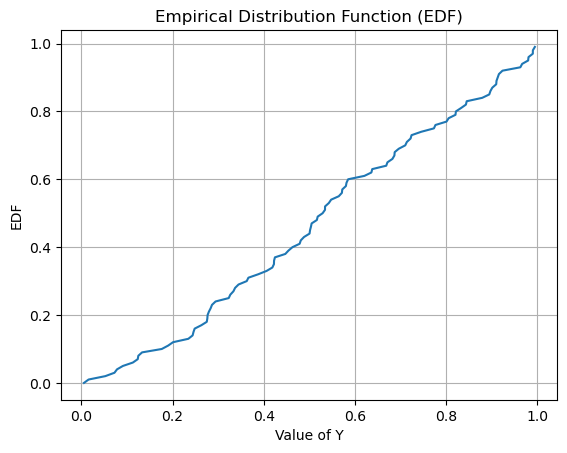

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def kernel_function(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def nadaraya_watson(X, Y, t, T, y, h_time, h_space):
    # Indicator function
    I = (Y <= y).astype(float)
    
    # Calculating the local time kernel
    time_kernel = kernel_function((t/T - X[:, 0]) / h_time)
    
    # Calculating the covariate directions kernel
    # Assuming X[:, 1:] contains the covariate directions
    space_distances = euclidean_distances(X[:, 1:], X[:, 1:])
    space_kernel = kernel_function(space_distances / h_space)
    
    # Calculating the product of the two kernels
    kernel_product = np.outer(time_kernel, space_kernel)
    
    # Calculating the numerator and denominator of the Nadaraya-Watson estimator
    numerator = np.sum(kernel_product * I[:, None], axis=0)
    denominator = np.sum(kernel_product, axis=0)
    
    # Avoiding division by zero
    denominator[denominator == 0] = 1
    
    # Calculating the weighted empirical distribution estimator
    f_hat = numerator / denominator
    
    return f_hat

# Example usage:
# Define your data matrix X, where the first column is the time variable
# and the remaining columns are the covariate directions
X = np.random.rand(100, 3)  # 100 data points, 1 time variable + 2 covariate directions
Y = np.random.rand(100)  # Random Y values for indicator function

# Define the other parameters
t = 0.5  # Current time
T = 1.0  # Total time
y = 0.5  # Value for indicator function
h_time = 0.1  # Bandwidth for the time kernel
h_space = 0.1  # Bandwidth for the space kernel

# Get the weighted empirical distribution estimator
f_hat = nadaraya_watson(X, Y, t, T, y, h_time, h_space)

# Plotting the EDF
plt.plot(np.sort(Y), np.linspace(0, 1, len(Y), endpoint=False))
plt.xlabel("Value of Y")
plt.ylabel("EDF")
plt.title("Empirical Distribution Function (EDF)")
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def kernel_function(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def nadaraya_watson(X, Y, t, T, h_time, h_space, y):
    # Calculating the local time kernel
    time_kernel = kernel_function((t/T - X[:, 0]) / h_time)
    
    # Calculating the covariate directions kernel
    # Assuming X[:, 1:] contains the covariate directions
    space_distances = euclidean_distances(X[:, 1:], X[:, 1:])
    space_kernel = kernel_function(space_distances / h_space)
    
    # Calculating the product of the two kernels
    kernel_product = np.outer(time_kernel, space_kernel)
    
    # Using the indicator function
    I = (Y[:, None] <= y).astype(int)
    
    # Calculating the numerator and denominator of the Nadaraya-Watson estimator
    numerator = np.sum(kernel_product * I, axis=0)
    denominator = np.sum(kernel_product, axis=0)
    
    # Avoiding division by zero
    denominator[denominator == 0] = 1
    
    # Calculating the weighted empirical distribution estimator
    F_hat = numerator / denominator
    
    return F_hat

# Example usage:
# Define your data matrix X, where the first column is the time variable
# and the remaining columns are the covariate directions
np.random.seed(42)
X = np.random.rand(100, 3)  # 100 data points, 1 time variable + 2 covariate directions
Y = np.sort(np.random.rand(100))

# Define the other parameters
t = 0.5  # Current time
T = 1.0  # Total time
h_time = 0.1  # Bandwidth for the time kernel
h_space = 0.1  # Bandwidth for the space kernel

# Calculate the true and estimated distribution functions for a range of y values
y_values = np.linspace(0, 1, 100)
F_true = [np.mean(Y <= y_val) for y_val in y_values]
F_hat = [nadaraya_watson(X, Y, t, T, h_time, h_space, y_val) for y_val in y_values]

# Simplify the plotting process by setting a fixed position for the legend

plt.plot(y_values, F_true, label='True distribution function')
plt.plot(y_values, F_hat, linestyle='dashed', label='Estimated distribution function')
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title('True vs. Estimated Distribution Functions')
plt.legend(loc='upper left')
plt.show()



ValueError: Image size of 567x209516 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

def kernel_function(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def nadaraya_watson_distribution(X, y, t, T, h_time, h_space):
    # Calculating the local time kernel
    time_kernel = kernel_function((t/T - X[:, 0]) / h_time)
    
    # Calculating the covariate directions kernel
    space_distances = euclidean_distances(X[:, 1:], X[:, 1:])
    space_kernel = kernel_function(space_distances / h_space)
    
    # Calculating the product of the two kernels
    kernel_product = np.outer(time_kernel, space_kernel)
    
    # Using indicator function
    I = (X[:, 1] <= y).astype(float)
    
    # Calculating the numerator and denominator of the Nadaraya-Watson estimator for distribution function
    numerator = np.sum(kernel_product * I[:, None], axis=0)
    denominator = np.sum(kernel_product, axis=0)
    
    # Avoiding division by zero
    denominator[denominator == 0] = 1
    
    # Calculating the weighted empirical distribution function estimator
    F_hat = numerator / denominator
    
    return F_hat

# Sample data
np.random.seed(42)
X = np.sort(np.random.rand(100, 3), axis=0)  # Sorting for better visualization

# Define the other parameters
t = 0.5  # Current time
T = 1.0  # Total time
h_time = 0.1  # Bandwidth for the time kernel
h_space = 0.1  # Bandwidth for the space kernel

# True distribution function (for visualization purposes in this example)
true_F = np.linspace(0, 1, X.shape[0])

# Estimating the distribution function
estimated_F = [nadaraya_watson_distribution(X, y, t, T, h_time, h_space) for y in X[:, 1]]

# Plotting
plt.plot(X[:, 1], true_F, label='True Distribution')
plt.plot(X[:, 1], estimated_F, label='Estimated Distribution', linestyle='--')
plt.xlabel('y')
plt.ylabel('F(y)')
plt.title('True vs. Estimated Distribution Function')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Jan Tinio\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 567x209539 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

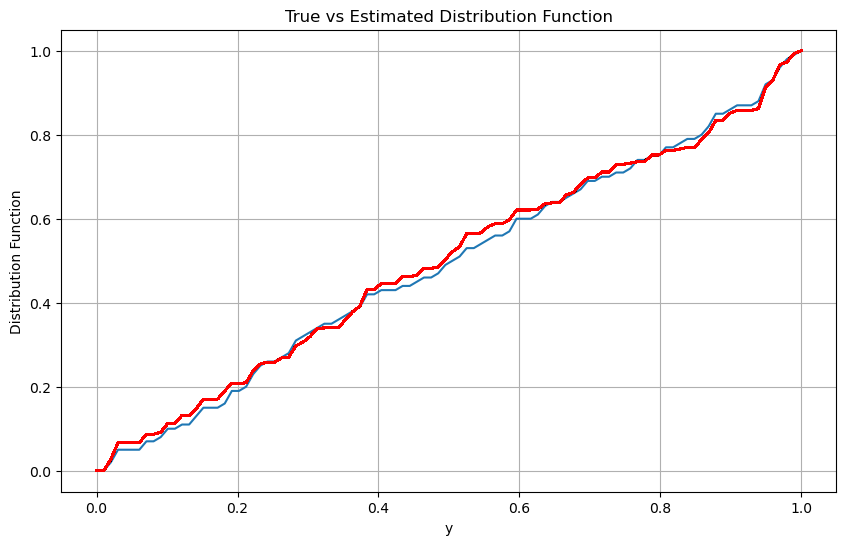

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

In [32]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

def kernel_function(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def nadaraya_watson(X, t, T, h_time, h_space, y):
    # Calculating the local time kernel
    time_kernel = kernel_function((t/T - X[:, 0]) / h_time)
    
    # Calculating the covariate directions kernel
    # Assuming X[:, 1:-1] contains the covariate directions
    # and X[:, -1] contains the Y values for the indicator function
    space_distances = euclidean_distances(X[:, 1:-1], X[:, 1:-1])
    space_kernel = kernel_function(space_distances / h_space)
    
    # Calculating the product of the two kernels
    kernel_product = np.outer(time_kernel, space_kernel)
    
    # Using indicator function instead of Y
    indicator_Y = (X[:, -1] <= y).astype(float)
    
    # Calculating the numerator and denominator of the Nadaraya-Watson estimator
    numerator = np.sum(kernel_product * indicator_Y[:, None], axis=0)
    denominator = np.sum(kernel_product, axis=0)
    
    # Avoiding division by zero
    denominator[denominator == 0] = 1
    
    # Calculating the weighted empirical distribution estimator
    f_hat = numerator / denominator
    
    return f_hat

# Generate some sample data
np.random.seed(0)
X_time = np.random.rand(100, 1)
X_space = np.random.rand(100, 1)
Y = np.random.rand(100, 1)
X = np.hstack([X_time, X_space, Y])

# Set parameters
t = 0.5  # Current time
T = 1.0  # Total time
h_time = 0.2  # Bandwidth for the time kernel
h_space = 0.2  # Bandwidth for the space kernel

# Calculate true distribution function values
y_values = np.linspace(0, 1, 100)
true_distribution = [np.mean(Y <= val) for val in y_values]

# Calculate estimated distribution function values
estimated_distribution = [nadaraya_watson(X, t, T, h_time, h_space, val) for val in y_values]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_values, true_distribution, label="True Distribution Function")
plt.plot(y_values, estimated_distribution, label="Estimated Distribution Function", color='r')
plt.xlabel('y')
plt.ylabel('Distribution Function')
plt.title('True vs Estimated Distribution Function')
plt.grid(True)
plt.show()

from scipy.stats import wasserstein_distance
# Define two probability distributions (as arrays)
distribution1 = true_distribution
distribution2 = estimated_distribution

# Compute the 1-Wasserstein distance
distance = wasserstein_distance(distribution1, distribution2)

print("1-Wasserstein Distance:", distance)


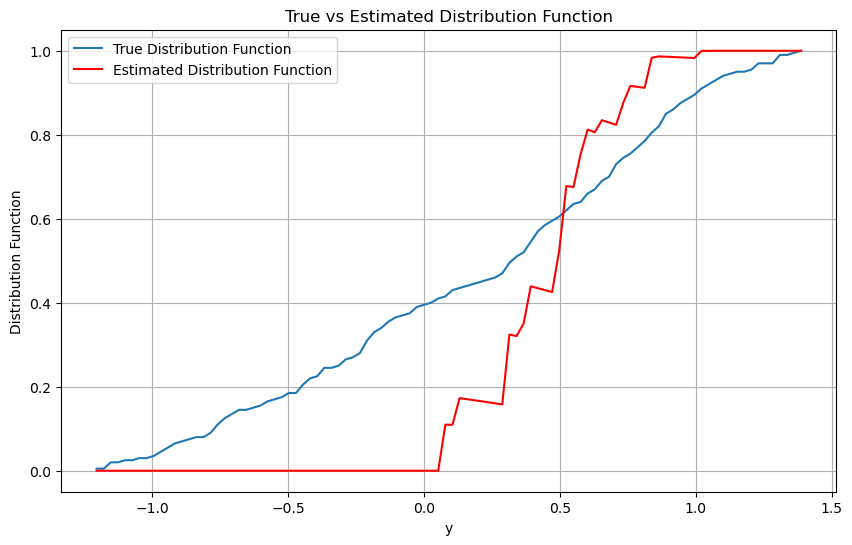

In [47]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

def kernel_function(u):
    return (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * u**2)

def nadaraya_watson(X, t, T, h_time, y):
    # Calculating the local time kernel
    time_kernel = kernel_function((t/T - X[:, 0]) / h_time)
    
    # Using indicator function instead of Y
    indicator_Y = (X[:, -1] <= y).astype(float)
    
    # Calculating the numerator and denominator of the Nadaraya-Watson estimator
    numerator = np.sum(time_kernel * indicator_Y)
    denominator = np.sum(time_kernel)
    
    # Avoiding division by zero
    if denominator == 0:
        return 0
    
    # Calculating the weighted empirical distribution estimator
    f_hat = numerator / denominator
    
    return f_hat

# Generate some sample locally stationary time series data
np.random.seed(0)
t = np.linspace(0, 10, 200)
y = np.sin(t) + 0.2 * np.random.randn(len(t))

# Create the data matrix X with columns for time and y values
X = np.column_stack([t, y])

# Set parameters
T = t.max()
h_time = 0.2  # Bandwidth for the time kernel (may need tuning)

# Calculate true distribution function values
y_values = np.linspace(y.min(), y.max(), 100)
true_distribution = [np.mean(y <= val) for val in y_values]

# Calculate estimated distribution function values
estimated_distribution = [nadaraya_watson(X, ti, T, h_time, val) for ti, val in zip(t, y_values)]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(y_values, true_distribution, label="True Distribution Function")
plt.plot(y_values, estimated_distribution, label="Estimated Distribution Function", color='r')
plt.xlabel('y')
plt.ylabel('Distribution Function')
plt.title('True vs Estimated Distribution Function')
plt.legend()
plt.grid(True)
plt.show()


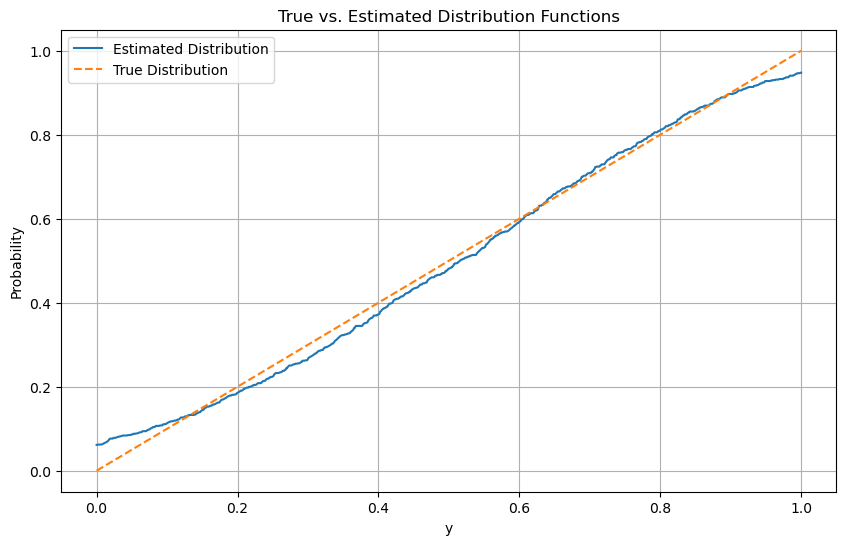

Text(0, 0.5, 'Value')

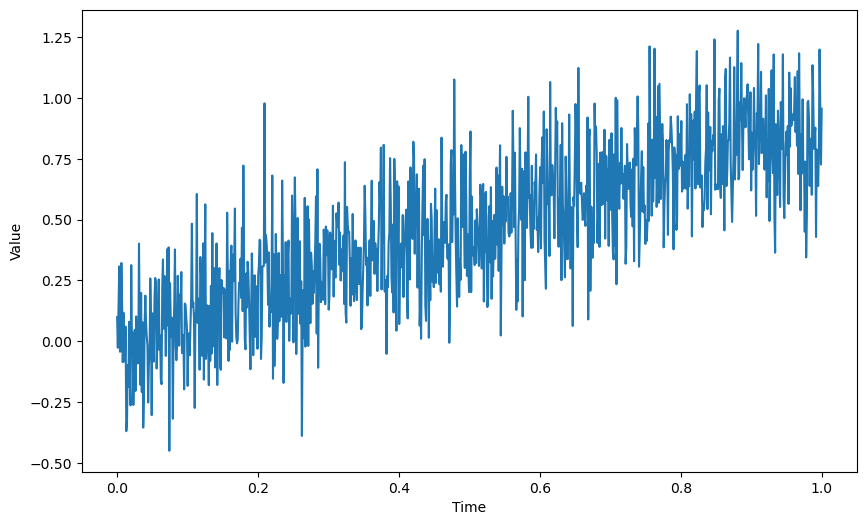

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 1000  # Number of data points
h = 0.5  # Bandwidth for the kernel

# 1. Generate locally stationary data
np.random.seed(42)
X = np.linspace(0, 1, n)
Y = np.sin(X) + 0.2 * np.random.randn(len(X))

# 2. Implement the Nadaraya-Watson kernel estimator
def kernel(u):
    return np.exp(-0.5 * u**2) / np.sqrt(2 * np.pi)

def nadaraya_watson(x, X, Y, h):
    weights = kernel((x - X) / h)
    return np.sum(weights * Y) / np.sum(weights)

# Compute kernel weights for each data point
weights = np.array([nadaraya_watson(x, X, Y, h) for x in X])

# 3. Compute the weighted empirical distribution estimator
def weighted_empirical_distribution(y, Y, weights):
    return np.sum(weights * (Y <= y)) / np.sum(weights)

# Compute estimated distribution values
y_values = np.linspace(0, 1, 1000)
estimated_distribution = np.array([weighted_empirical_distribution(y, Y, weights) for y in y_values])

# True distribution values
true_distribution = np.arange(1, len(np.sort(Y)) + 1) / len(np.sort(Y))

# 4. Plot the true and estimated distribution functions
plt.figure(figsize=(10, 6))
plt.plot(y_values, estimated_distribution, label='Estimated Distribution')
plt.plot(y_values, true_distribution, linestyle='--', label='True Distribution')
plt.xlabel('y')
plt.ylabel('Probability')
plt.title('True vs. Estimated Distribution Functions')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(X, Y, label="Time Series Data")
plt.xlabel('Time')
plt.ylabel('Value')

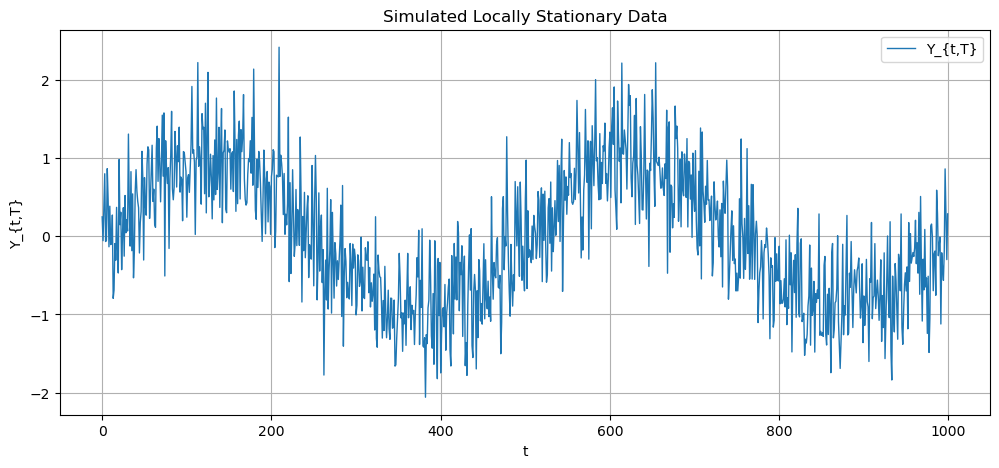

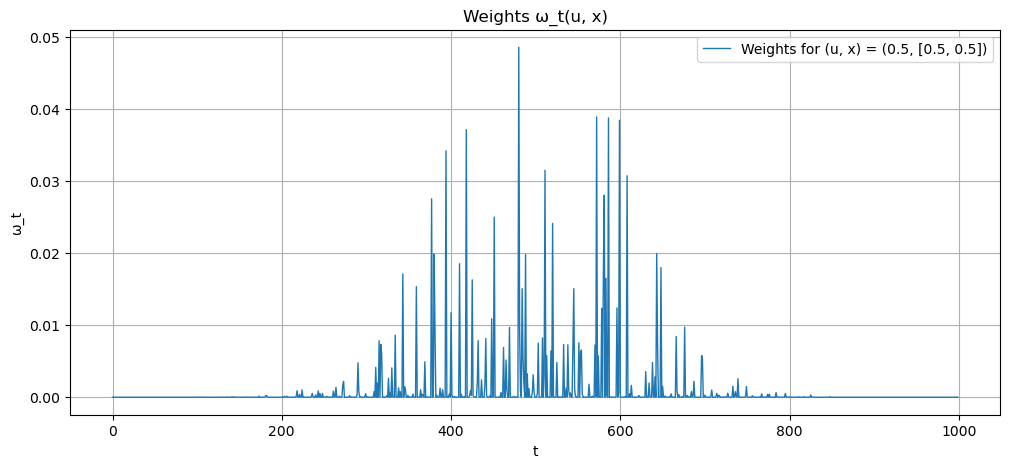

KeyboardInterrupt: 

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Y_{t,T}", linewidth=1)
plt.title("Simulated Locally Stationary Data")
plt.xlabel("t")
plt.ylabel("Y_{t,T}")
plt.legend()
plt.grid(True)
plt.show()

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the weight function
def omega(t, u, x, h1, h2):
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h1 = 0.1
h2 = 0.1

weights = [omega(t, u_test, x_test, h1, h2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
plt.figure(figsize=(12, 5))
plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
plt.title("Weights ω_t(u, x)")
plt.xlabel("t")
plt.ylabel("ω_t")
plt.legend()
plt.grid(True)
plt.show()

def empirical_distribution_estimator(u, x, v, h1, h2):
    weights = np.array([omega(t, u, x, h1, h2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), 1000)
F_values = [empirical_distribution_estimator(u_test, x_test, v, h1, h2) for v in v_values]

# Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.plot(v_values, F_values, label=f"Estimated Distribution for (u, x) = ({u_test}, {x_test})", linewidth=1)
plt.title("Estimated Distribution $F_{\hat{\pi}(\cdot|u,\boldsymbol{x})}(v)$")
plt.xlabel("v")
plt.ylabel("$F_{\hat{\pi}(\cdot|u,\boldsymbol{x})}(v)$")
plt.legend()
plt.grid(True)
plt.show()




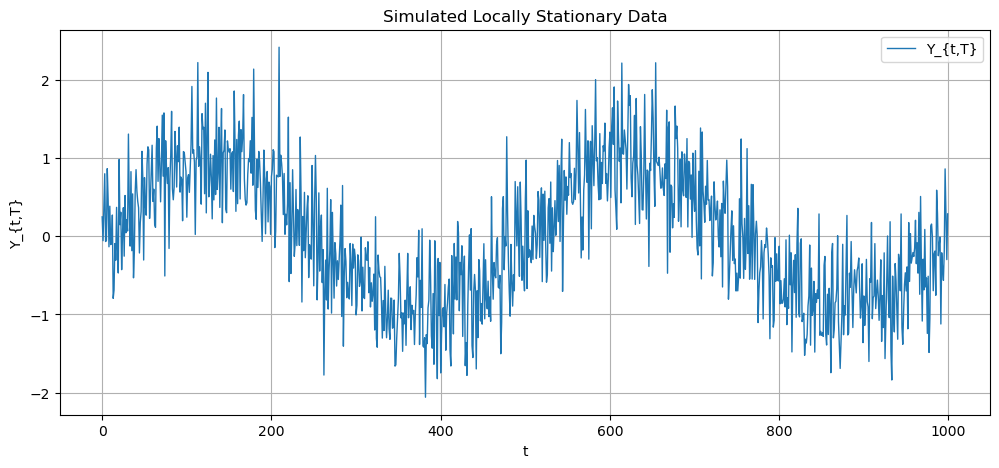

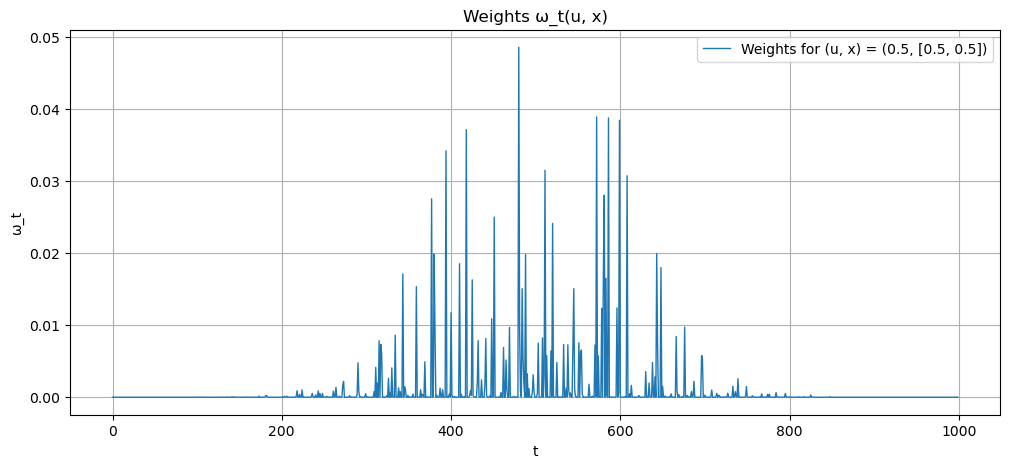

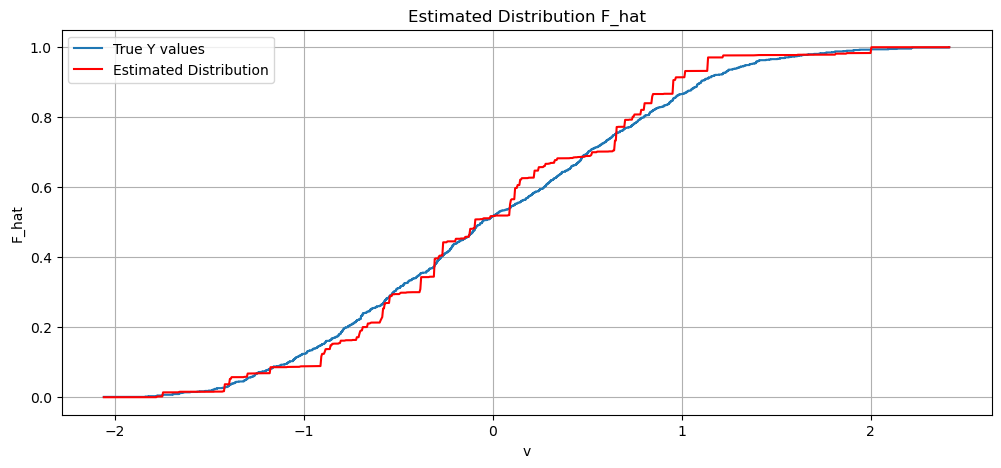

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Length of time series
d = 2  # Number of covariates

# Generate locally stationary data
np.random.seed(42)
Y = np.sin(np.linspace(0, 4 * np.pi, T)) + np.random.normal(0, 0.5, T)  # Time series with noise
X = np.random.rand(T, d)  # Random covariates

# Plot the generated data
plt.figure(figsize=(12, 5))
plt.plot(Y, label="Y_{t,T}", linewidth=1)
plt.title("Simulated Locally Stationary Data")
plt.xlabel("t")
plt.ylabel("Y_{t,T}")
plt.legend()
plt.grid(True)
plt.show()

# Define Gaussian kernels
def K_h1(z, h1):
    return np.exp(-z**2 / (2 * h1**2))

def K_h2(z, h2):
    return np.exp(-z**2 / (2 * h2**2))

# Define the weight function
def omega(t, u, x, h1, h2):
    numerator = K_h1(u - t / T, h1) * np.prod(K_h2(x - X[t-1], h2))
    denominator = np.sum([K_h1(u - s / T, h1) * np.prod(K_h2(x - X[s-1], h2)) for s in range(1, T+1)])
    return numerator / denominator

# Test the weight function for a given (u, x)
u_test = 0.5
x_test = np.array([0.5, 0.5])
h1 = 0.1
h2 = 0.1

weights = [omega(t, u_test, x_test, h1, h2) for t in range(1, T+1)]

# Plot the weights for the given (u, x) without LaTeX issues
plt.figure(figsize=(12, 5))
plt.plot(weights, label="Weights for (u, x) = (0.5, [0.5, 0.5])", linewidth=1)
plt.title("Weights ω_t(u, x)")
plt.xlabel("t")
plt.ylabel("ω_t")
plt.legend()
plt.grid(True)
plt.show()

def ecdf(u, x, v, h1, h2):
    weights = np.array([omega(t, u, x, h1, h2) for t in range(1, T+1)])
    indicator = (Y <= v).astype(int)
    return np.sum(weights * indicator)

# Values for plotting
v_values = np.linspace(Y.min(), Y.max(), 1000)
#F=ecdf(u_test, x_test, 1.5, h1, h2)
#print(F)
F_values = [ecdf(u_test, x_test, v, h1, h2) for v in v_values]

#True CDF
data1_sorted = np.sort(Y)
cdf1 = np.arange(1, len(data1_sorted) + 1) / len(data1_sorted)
#Plot the estimated distribution function
plt.figure(figsize=(12, 5))
plt.step(data1_sorted, cdf1, where='post', label='True Y values')
plt.plot(v_values, F_values, label="Estimated Distribution", color='red')
plt.title("Estimated Distribution F_hat")
plt.xlabel("v")
plt.ylabel("F_hat")
plt.legend()
plt.grid(True)
plt.show()
